# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your Emory ID below

In [5]:
# Write your answer here
2548361

<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


**By printing the message, you acknowledge that you will abide by Emory's code of conduct.**


In [1]:
# Write your answer here:
print("I will abide by Emory's code of conduct")

I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [17]:
# Write your answer here
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime

<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for the following currencies:

- 1 euro (EUR) to dollar (USD)
- 1 pound (GPB) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "currencies.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 20.


In [37]:
# Write your own code
currency = pd.read_csv("data_raw/currencies.csv")
currency["date"] = pd.to_datetime(currency["date_string"], format = "%A, %b %d, %Y")

<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "gbp_to_usd" and "eur_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 Euro to USD" and "1 GPB to USD"

Hint: See Lecture 21 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


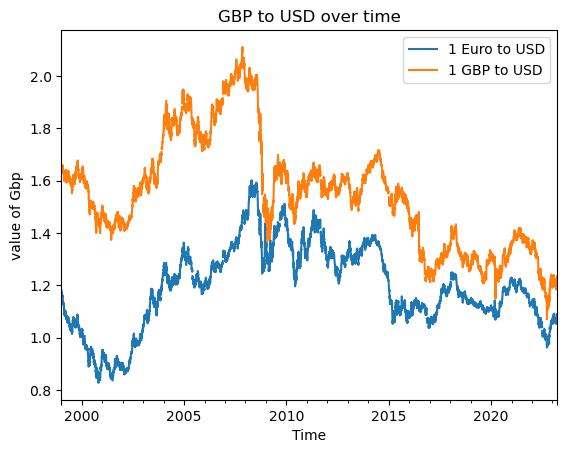

In [63]:
# Write your own code
currency[["date","gbp_to_usd","eur_to_usd"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("value of Gbp")
plt.title("GBP to USD over time")
plt.legend(["1 Euro to USD","1 GBP to USD"])

<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_euro" which computes the percentage daily <br>
growth rate of "eur_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)``` as in Lecture 21

In [64]:
# Write your own code
currency["diff_euro"] = currency["eur_to_usd"].diff()
currency["lag_euro"]    = currency["eur_to_usd"].shift(1)

currency["growth_euro"] = currency["diff_euro"]* 100/currency["lag_euro"]

<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_euro" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_euro" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 21 to create a shaded region <br>
for time periods where "bool_cond" is true.



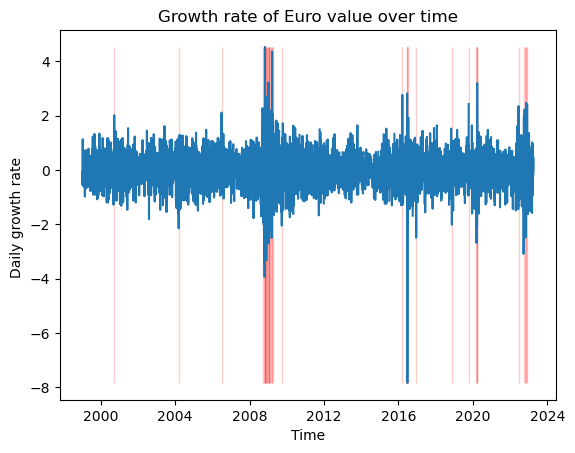

In [65]:
# Write your own code

currency["bool_cond"] = (currency["growth_euro"] > 2) | (currency["growth_euro"] < -2)

plt.plot("date", "growth_euro", data = currency)
plt.xlabel("Time")
plt.ylabel("Daily growth rate ")
plt.title("Growth rate of Euro value over time")

vec_y = currency["growth_euro"]
plt.fill_between(x= currency["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = currency["bool_cond"],
                 alpha = 0.2,color = "red")

<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the column "date" and freq to "m" (month)
- Follow the instructions in Lecture 20 to compute an aggregate dataset <br>
by month which computes the standard deviation of "eur_to_usd"
- Display the dataset




In [66]:
# Write your own code
month_config = pd.Grouper(key='date', freq='m') # year (y), month (m), week (w), day(d)

monthlydata = (currency
               .groupby(month_config) 
               .agg(eur_std = ("eur_to_usd","std"))
               .reset_index())

monthlydata

,date,eur_std
0,1999-01-31,0.007345
1,1999-02-28,0.013345
2,1999-03-31,0.010475
3,1999-04-30,0.006172
4,1999-05-31,0.013046
...,...,...
286,2022-11-30,0.027308
287,2022-12-31,0.011389
288,2023-01-31,0.015046
289,2023-02-28,0.008972
